# Simple Moving Average Model to Forecast Bus Demand

## Imports

In [1]:
import pandas as pd
from sklearn.metrics import mean_absolute_error, mean_squared_error, mean_absolute_percentage_error
from matplotlib import pyplot as plt
import warnings
warnings.filterwarnings('ignore')

## Reading Data

In [2]:
df = pd.read_csv("data/preprocessed_data.csv", engine="c")

## Utils

In [3]:
def split_categories(df, column):
    """
    A method that splits dataframe into separate dataframes according to contained groups of given column
    :param df: dataframe
    :param column: string column name that includes groups
    :return: list of dataframes
    """
    df_list = []
    groups = df.groupby(df[column])
    for i in range(len(groups)):
        df_list.append(groups.get_group(i))
    return df_list

In [4]:
def evaluate_forecast(y_test, yhat):
    """
    Evaluation metrics with tensorflow
    :param y_test: real target values of test values
    :param yhat: predicted target values from test values
    :return: evaluation scores
    """
    mae = mean_absolute_error(y_test,yhat)
    print('mae:', mae)
    mse = mean_squared_error(y_test,yhat)
    print('mse:', mse)
    mape = mean_absolute_percentage_error(y_test,yhat)
    print('mape:', mape)

In [5]:
municipalities = split_categories(df, "municipality_id")

## Calculate SMA

In [6]:
window= 11
for i in municipalities:
    i["next_hour_y"] = i["usage"].shift(periods=-1)
    i['SMA'] = i.iloc[:,3].rolling(window=window).mean()
    # Fix last value using last value
    i["next_hour_y"].iloc[-1] = i["next_hour_y"].iloc[0]

## Evaluate

### MAE score for all dataset

In [7]:
for i in municipalities:
    print(mean_absolute_error(i[window:-1]['next_hour_y'], i[window:-1]['SMA']))

129.83290957064042
75.92282521787799
100.34699235095015
234.00095413235258
587.963032701687
169.15465039577836
171.5736734095573
190.50219077316703
180.48250213213933
124.34322779243622


### MAE, MSE, MAPE scores for test dataset

In [8]:
count = 0
for i in municipalities:
    test = i[i["date"] > "2017-08-05 06"]
    print(f"Municipality {count}")
    evaluate_forecast(test['next_hour_y'], test['SMA'])
    print("------------")
    count += 1

Municipality 0
mae: 128.22954545454544
mse: 36048.85165027548
mape: 0.2399395557311609
------------
Municipality 1
mae: 74.24773232323231
mse: 10377.865672562746
mape: 0.28368963387518087
------------
Municipality 2
mae: 104.571632996633
mse: 16877.791983683637
mape: 0.22899955922239826
------------
Municipality 3
mae: 249.51412794612796
mse: 98123.31475960955
mape: 0.30287480386864885
------------
Municipality 4
mae: 600.461398989899
mse: 612106.0775563332
mape: 0.3322315802995134
------------
Municipality 5
mae: 160.94349242424244
mse: 67815.59382531853
mape: 2.475914557247919
------------
Municipality 6
mae: 174.92078787878788
mse: 49587.86678562732
mape: 0.17499218881387485
------------
Municipality 7
mae: 224.82570454545456
mse: 71171.13971772748
mape: 0.21210691350630148
------------
Municipality 8
mae: 191.37162373737374
mse: 57613.162532882394
mape: 0.23179669484328203
------------
Municipality 9
mae: 140.21073232323232
mse: 31567.00101746633
mape: 0.2382360565516123
----------

## Visualise

<Figure size 2000x600 with 0 Axes>

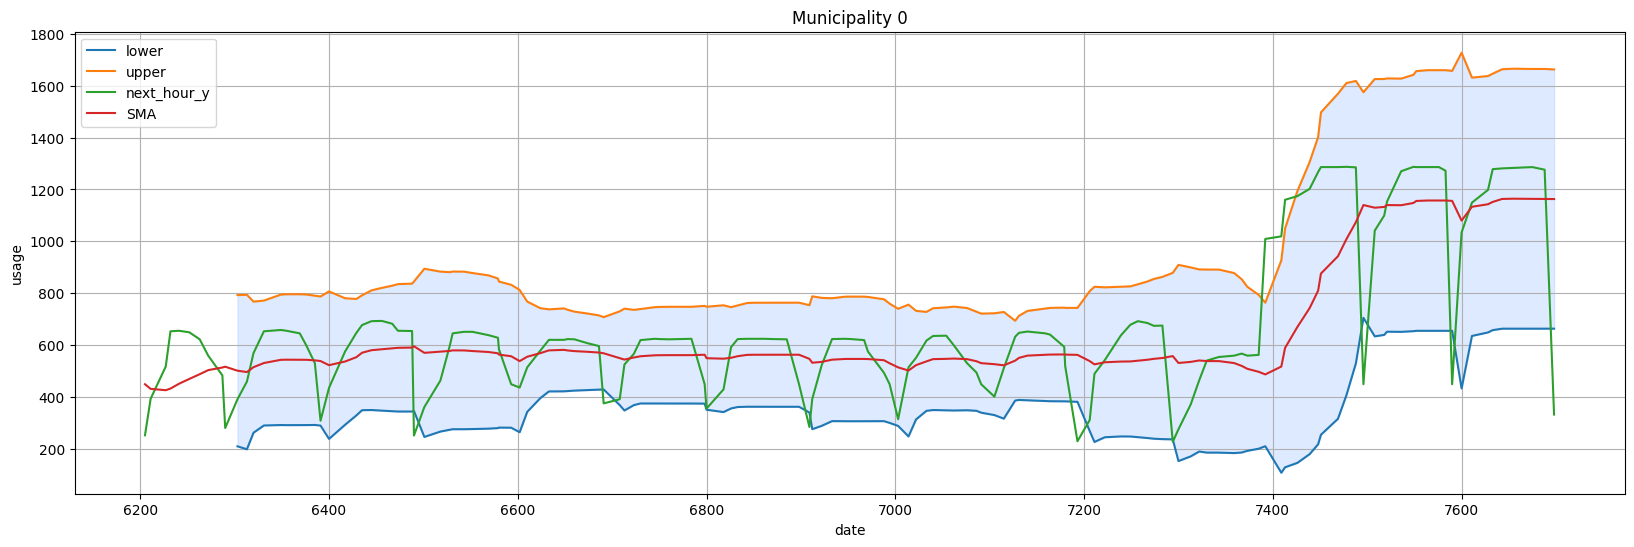

<Figure size 2000x600 with 0 Axes>

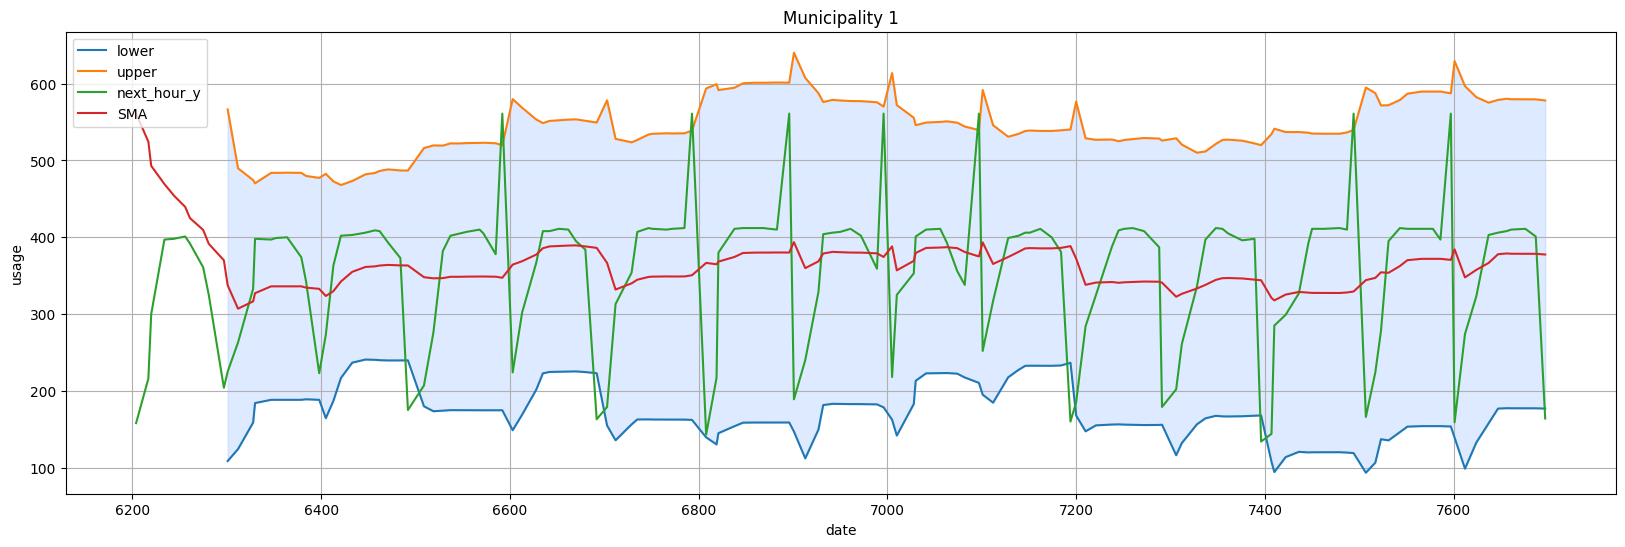

<Figure size 2000x600 with 0 Axes>

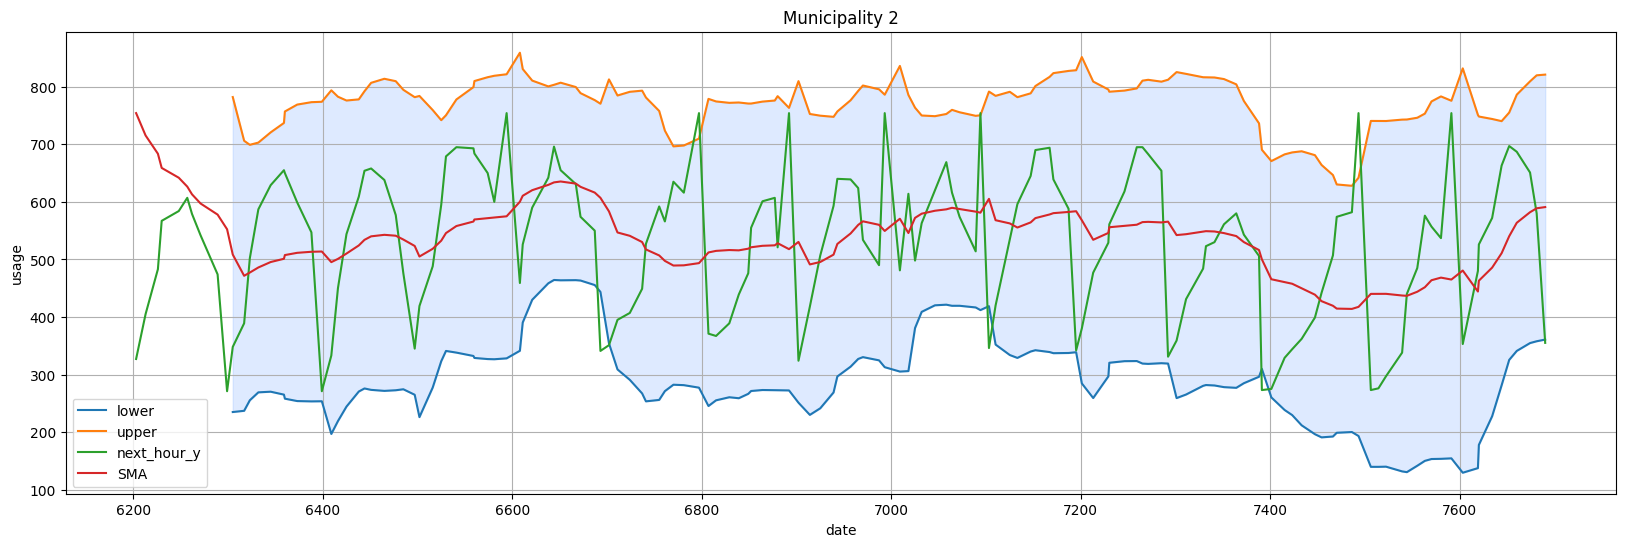

<Figure size 2000x600 with 0 Axes>

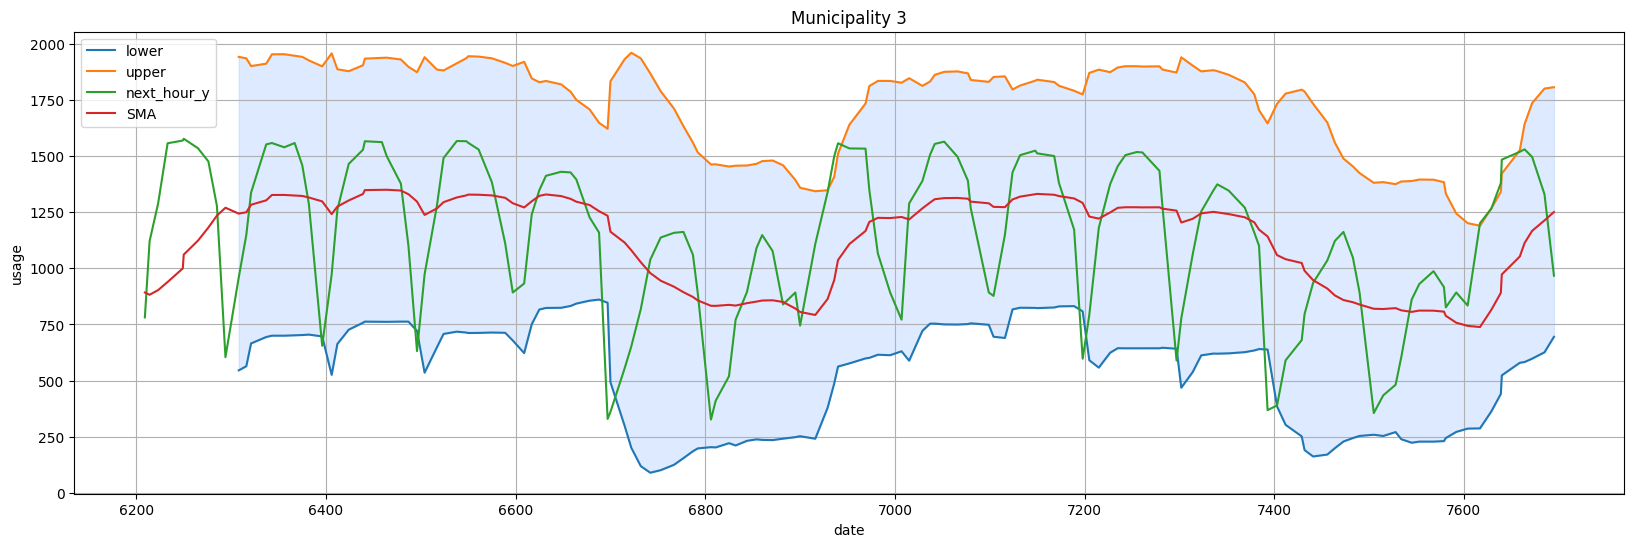

<Figure size 2000x600 with 0 Axes>

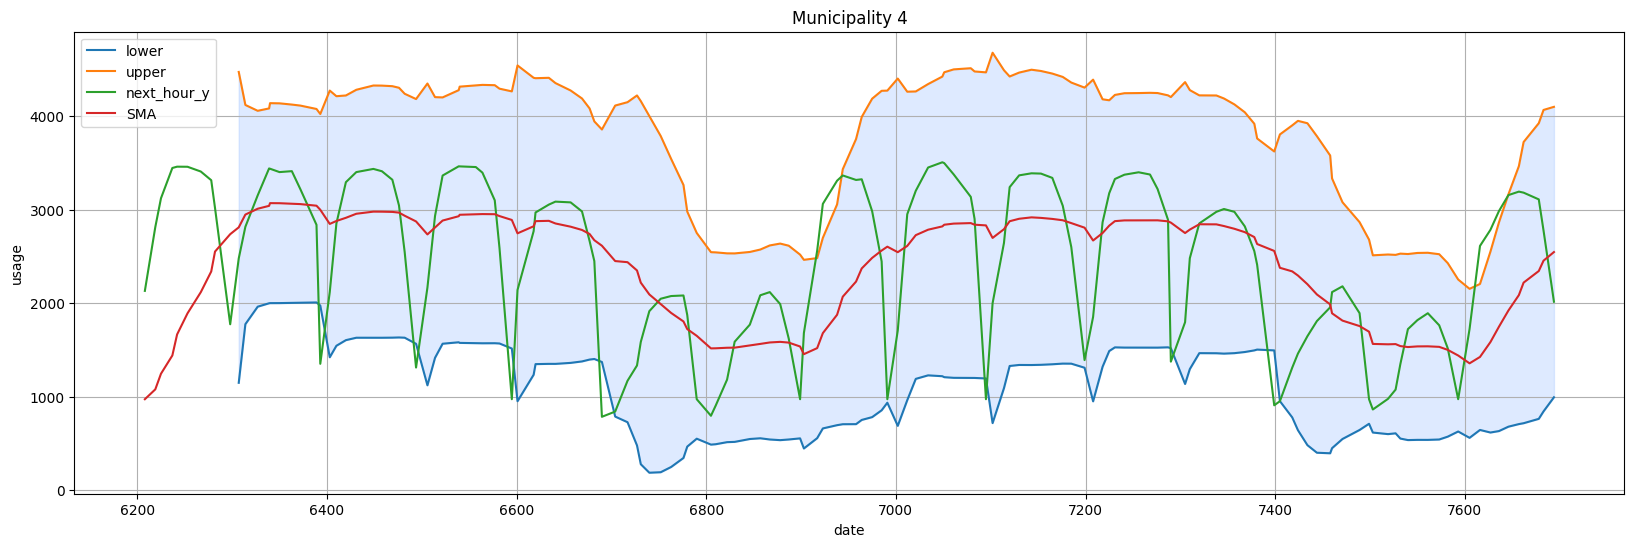

<Figure size 2000x600 with 0 Axes>

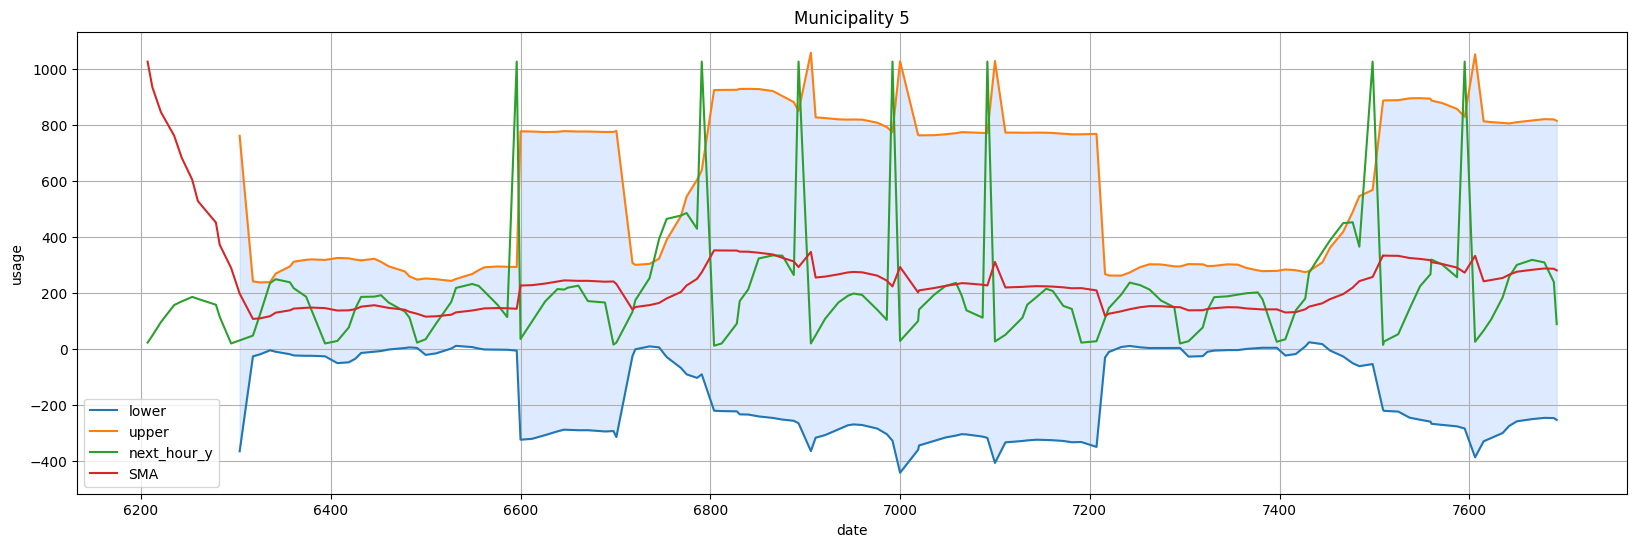

<Figure size 2000x600 with 0 Axes>

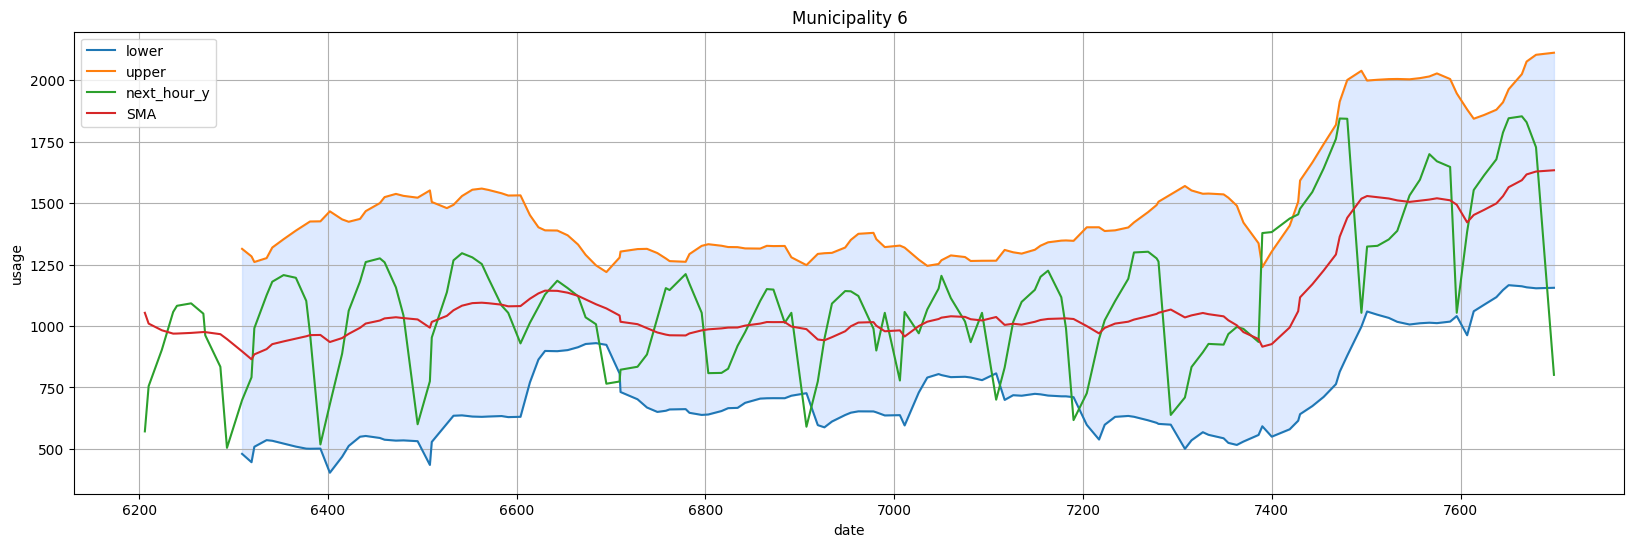

<Figure size 2000x600 with 0 Axes>

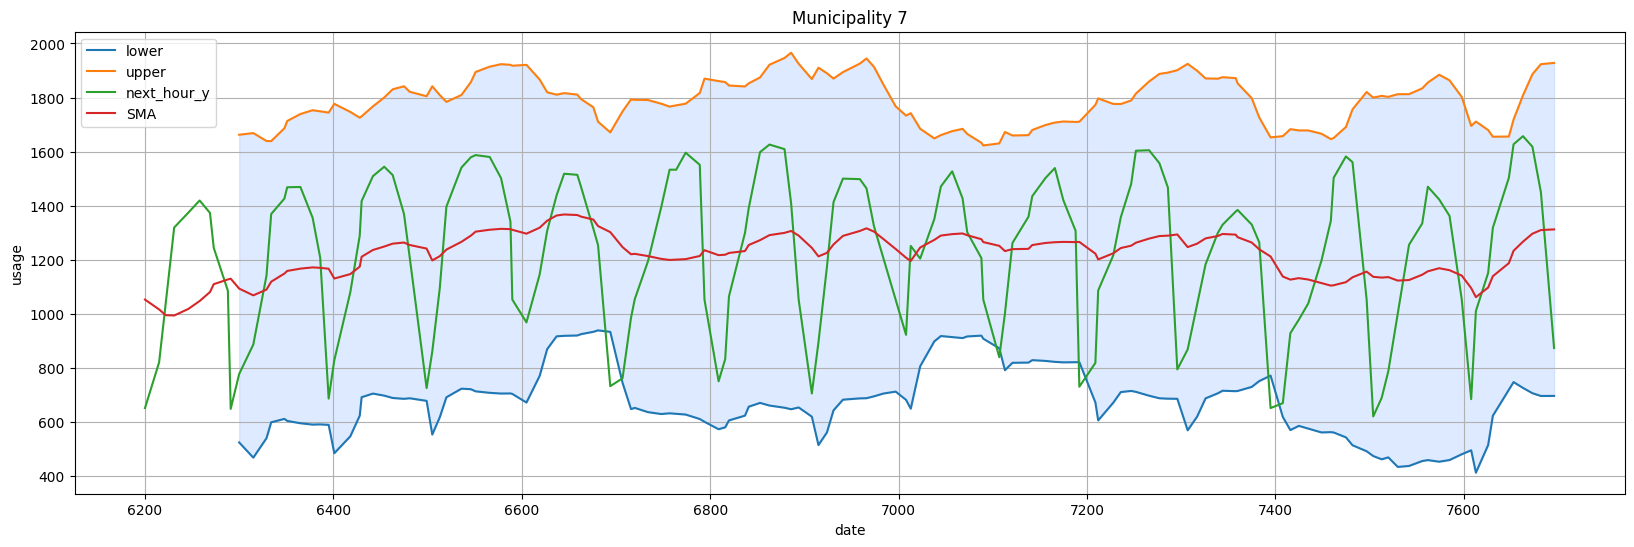

<Figure size 2000x600 with 0 Axes>

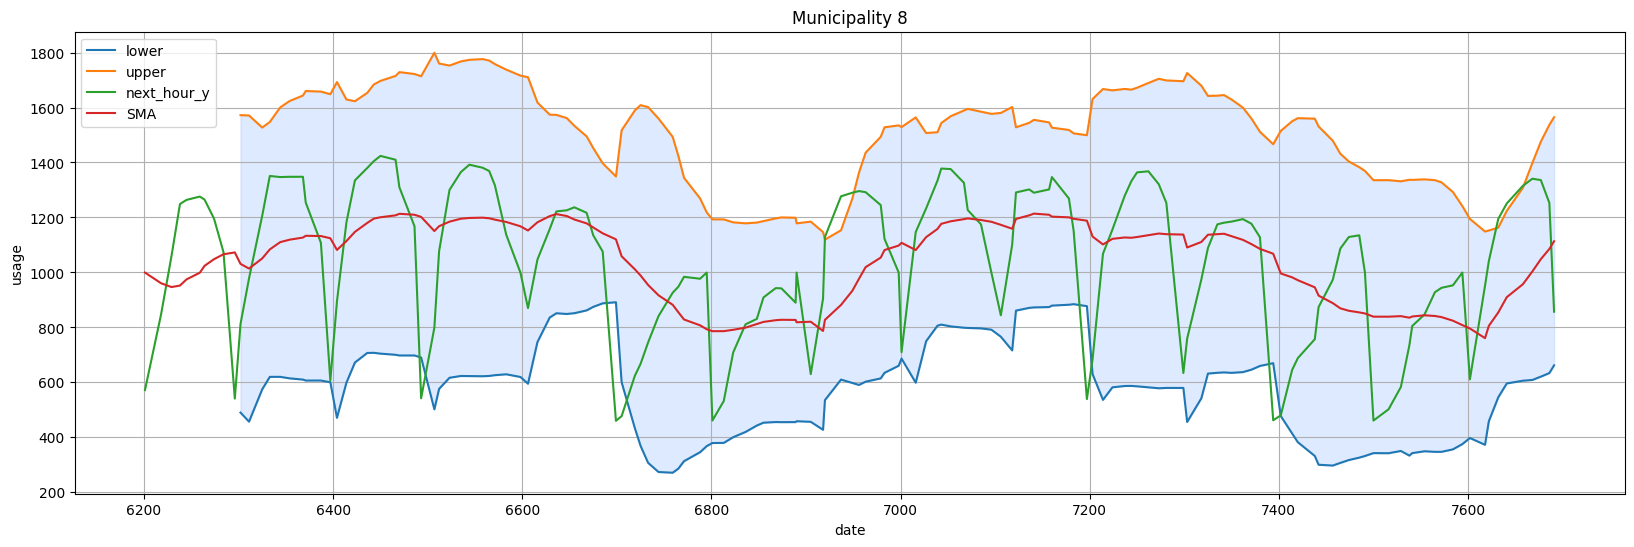

<Figure size 2000x600 with 0 Axes>

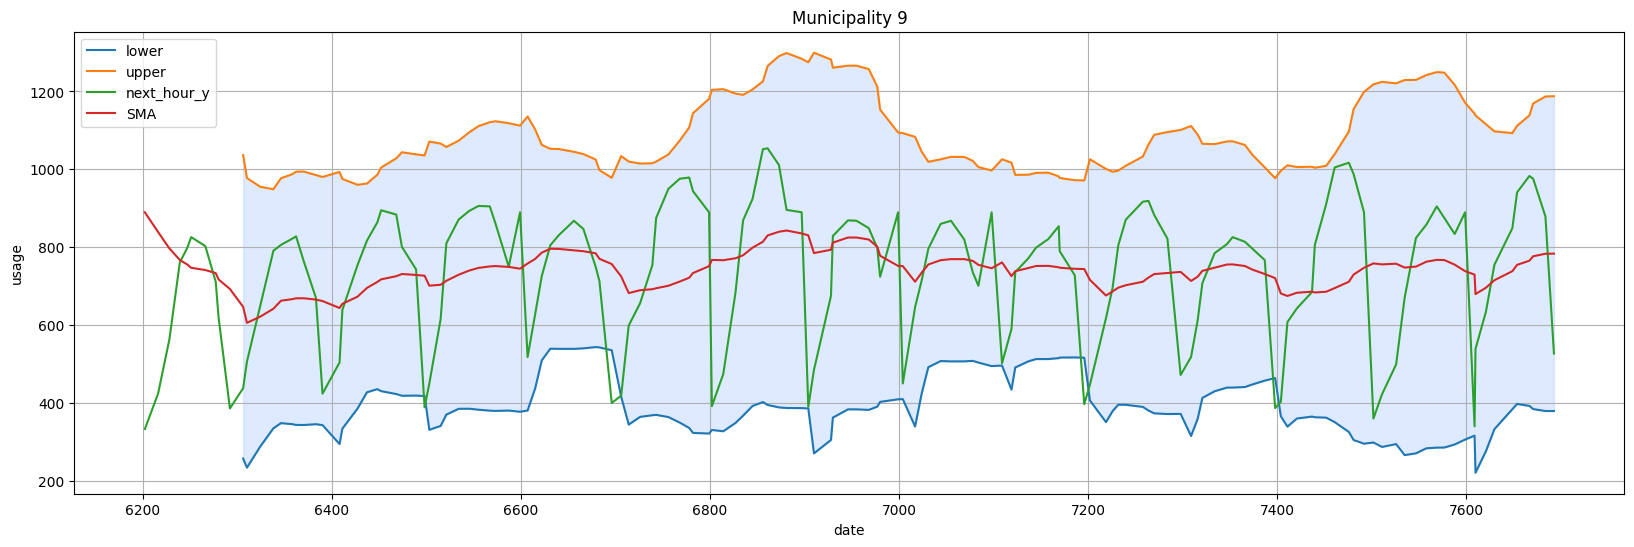

In [9]:
count = 0
for i in municipalities:
    test = i[i["date"] > "2017-08-05 06"]
    rstd = test.iloc[:,3].rolling(window=window).std()
    bands = pd.DataFrame()
    bands['timestamp']= test['timestamp'].copy()
    bands['lower'] = test['SMA'] - 2 * rstd
    bands['upper'] = test['SMA'] + 2 * rstd

    bands = bands.join(test['next_hour_y']).join(test['SMA'])
    fig = plt.figure(figsize=(20, 6))
    ax = bands.plot(title='SMA', figsize=(20, 6))
    ax.fill_between(bands.index, bands['lower'], bands['upper'], color='#ADCCFF', alpha=0.4)
    ax.set_xlabel('date')
    ax.set_ylabel('usage')
    ax.set_title(f"Municipality {count}")
    count += 1
    ax.grid()

    plt.show()